In [9]:
import matplotlib.pyplot as plt
import numpy as np
from random import random, sample, randrange

from society.agent import Agent, TrainableAgent
from society.simulations.weighted import WeightedNetworkSimulation
from society.strategies.gameplay.constant import AllC, AllD
from society.strategies.gameplay.random import RandomGameplayStrategy
from society.strategies.gameplay.tft import TitForTat
from society.visualisation.network import *
from scipy.special import softmax

plt.rcParams["figure.figsize"] = (10, 6)

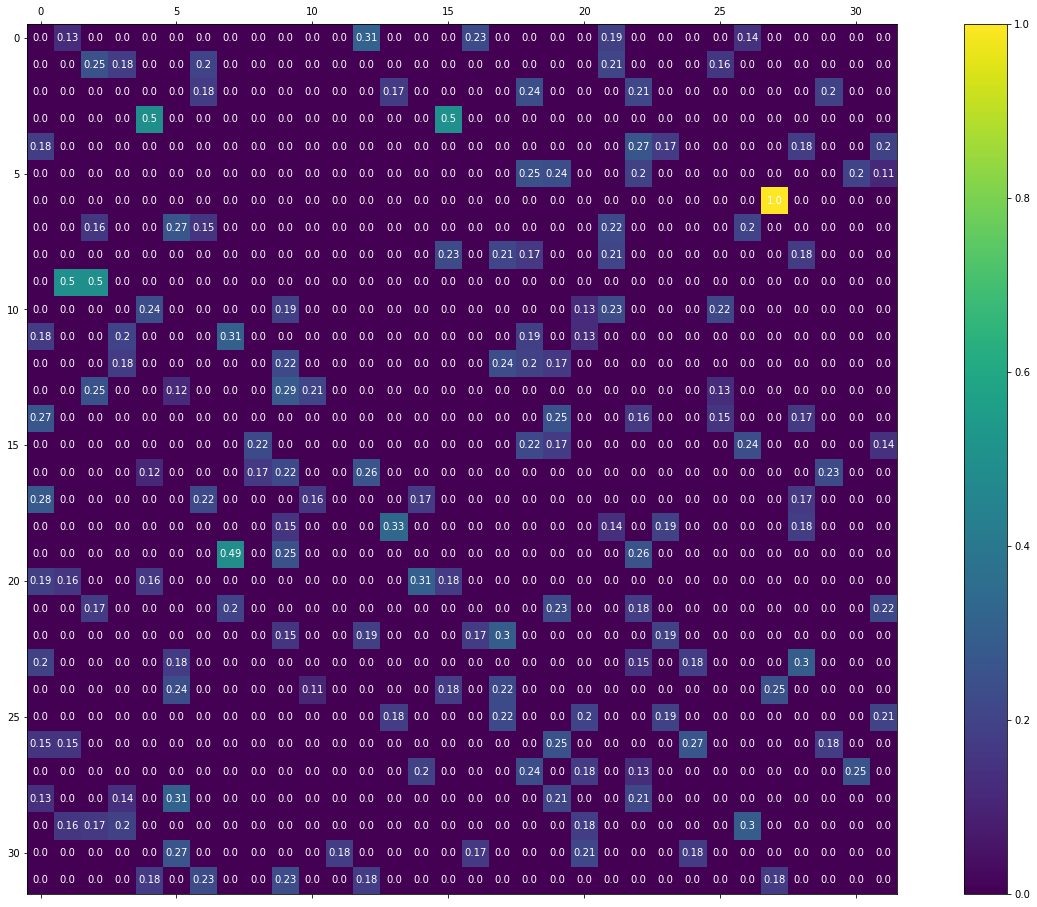

In [10]:
POPULATION = 32
agents = [
    Agent(None, TitForTat(), i, POPULATION)
    for i in range(POPULATION)
]

# weights_matrix = np.random.random((POPULATION, POPULATION))

weights_matrix = np.zeros((POPULATION, POPULATION))
for i, _ in enumerate(agents):
    partner_count = min(randrange(1, POPULATION), 5)
    partners = sample(list(set(range(POPULATION)) - {i}), k=partner_count)
    edge_weights = softmax(np.random.random((partner_count,)))
    for partner, w in zip(partners, edge_weights):
        weights_matrix[i, partner] = w


weights = nx.MultiDiGraph()
weights.add_weighted_edges_from(
    [
        (i, j, weights_matrix[i, j])
        for i, _ in enumerate(agents)
        for j, _ in enumerate(agents)
        if i != j
    ]
)

plot_matrix(weights_matrix, digits=2, figsize=(24, 16))

None


In [11]:
sim = WeightedNetworkSimulation(agents, weights)
sim.reset()

for i in range(100):
    sim.play_round()


[(22, 84900), (18, 81600), (9, 80700), (0, 75900), (27, 74700), (19, 73500), (2, 71700), (5, 70800), (4, 65700), (1, 64800), (21, 64800), (17, 63900), (28, 61800), (20, 60300), (7, 60000), (31, 59700), (15, 59400), (26, 59100), (3, 58500), (6, 58500), (12, 57900), (23, 54000), (13, 50400), (24, 50100), (14, 49800), (25, 48300), (16, 47400), (29, 45900), (30, 43800), (10, 43500), (8, 43200), (11, 35400)]


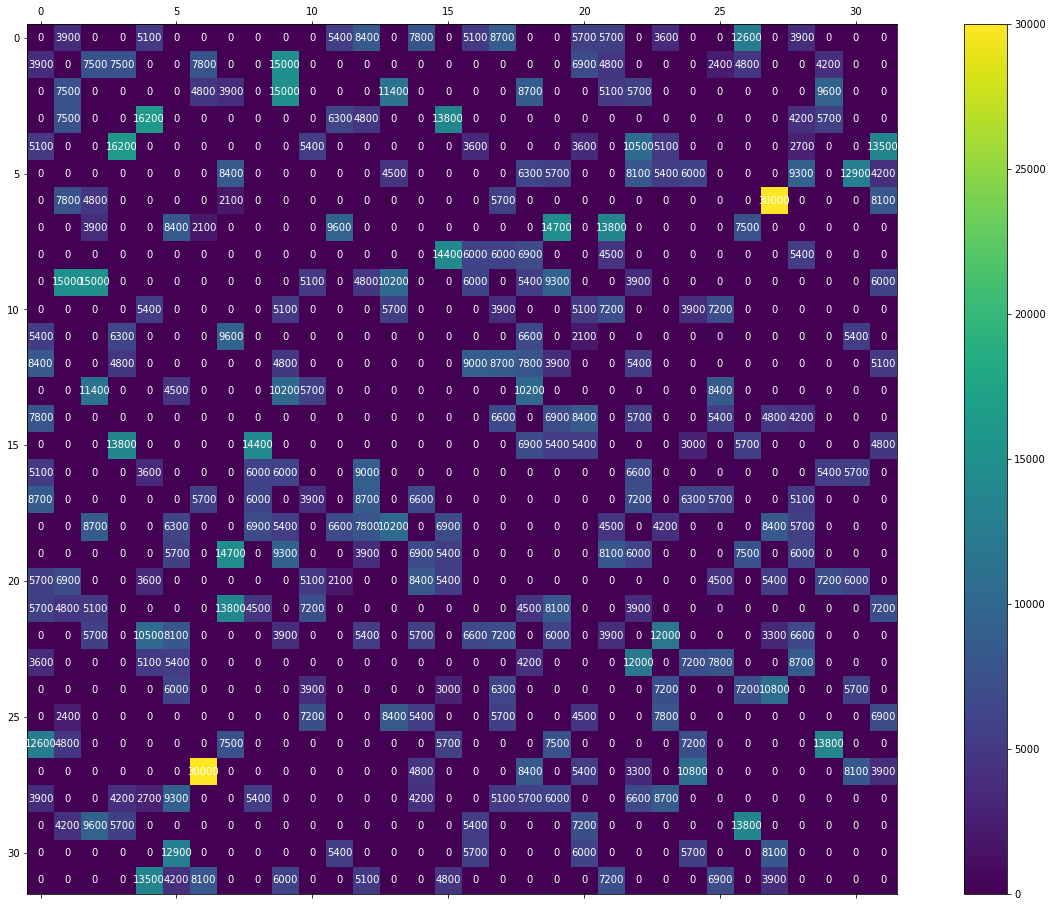

In [12]:
returns_matrix = [[sum(r) if len(r) > 0 else 0 for r in agent] for agent in sim.returns]
ranked_partners = sorted([(i, sum(returns_matrix[i])) for i in range(POPULATION)], key=lambda x: x[1], reverse=True)
print(ranked_partners)

plot_matrix(returns_matrix, figsize=(24, 16))

In [13]:
# # Frequencies by agent
# print("  ", *[f"{i:<8}" for i in range(POPULATION)])
# print("  ", "=" * (9 * POPULATION - 1))
# for index, agent in enumerate(sim.returns):
#     frequencies_by_partner = [len(r) if len(r) > 0 else 0 for r in agent]
#     print(
#         f"{index}:",
#         *[f"{r:<8}" for r in frequencies_by_partner],
#         "=>",
#         sum(frequencies_by_partner),
#     )